<div style='background-color: #fff7f7; border: 3px solid Red;'>
    <font size="+1" color="Red">
        <b>Please comment and upvote if you like this work!</b>
    </font>
</div>
<div style='background-color: #fff7f7; border: 3px solid Blue;'>
    <font size="+1" color="Red">
        <b>Take a look at the other notebooks in my profile ->
        <a href="https://www.kaggle.com/killa92/code">  Kaggle Notebooks </a></b>
    </font>
</div>    
<div style='background-color: #fff7f7; border: 3px solid yellow;'>
    <font size="+1" color="Red">
        <b><span style='color: green;'>Let's Support Each Other!!</span></b>
    </font>
</div>

<div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>🗂️1. Custom Datasets and DataLoaders 🗂️</b></font>
</div>

In [1]:
import os, torch, shutil, numpy as np, pandas as pd
from glob import glob; from PIL import Image
from torch.utils.data import random_split, Dataset, DataLoader
from torchvision import transforms as T
torch.manual_seed(2024)

class CustomDataset(Dataset):
    
    def __init__(self, root, data_type, transformations = None):
        
        self.transformations, self.data = transformations, data_type
        self.meta_data = pd.read_csv(f"{root}/{data_type}/_classes.csv")
        cls_names = [name for name in list(self.meta_data.columns) if name != "filename"]
        self.cls_names, self.cls_counts, self.im_paths, self.labels, count = {}, {}, [], [], 0
        
        for idx in range(len(self.meta_data)):
            data = list(self.meta_data.iloc[idx])
            try: 
                label = data.index(1) - 1; cls_name = cls_names[label]
                self.im_paths.append(f"{root}/{self.data}/{data[0]}"); self.labels.append(label)
                if cls_name not in self.cls_names: self.cls_names[cls_name] = count; count += 1; self.cls_counts[cls_name] = 1
                else: self.cls_counts[cls_name] += 1
            except: print("Data is not labeled; so, skipping..."); continue
        
        assert len(self.im_paths) == len(self.labels)
        
    def get_class(self, path): return os.path.dirname(path).split("/")[-1]
    
    def __len__(self): return len(self.im_paths)

    def __getitem__(self, idx):
        
        im_path = self.im_paths[idx]
        im = Image.open(im_path).convert("RGB")
        gt = self.labels[idx]
        if self.transformations is not None: im = self.transformations(im)
        
        return im, gt
    
def get_dls(root, transformations, bs, split = [0.9, 0.05, 0.05], ns = 4):
    
    tr_ds = CustomDataset(root = root, data_type = "train", transformations = transformations)
    vl_ds = CustomDataset(root = root, data_type = "valid",transformations = transformations)
    ts_ds = CustomDataset(root = root, data_type = "test",transformations = transformations)
    
    tr_dl, val_dl, ts_dl = DataLoader(tr_ds, batch_size = bs, shuffle = True, num_workers = ns), DataLoader(vl_ds, batch_size = bs, shuffle = False, num_workers = ns), DataLoader(ts_ds, batch_size = 1, shuffle = False, num_workers = ns)
    
    return tr_dl, val_dl, ts_dl, tr_ds.cls_names

root = "/kaggle/input/fruits-by-yolo-fruits-detection/Fruits by YOLO/Fruits by YOLO"
mean, std, im_size = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225], 224
tfs = T.Compose([T.Resize((im_size, im_size)), T.ToTensor(), T.Normalize(mean = mean, std = std)])
tr_dl, val_dl, ts_dl, classes = get_dls(root = root, transformations = tfs, bs = 32)

print(len(tr_dl)); print(len(val_dl)); print(len(ts_dl)); print(classes)

Data is not labeled; so, skipping...
Data is not labeled; so, skipping...
Data is not labeled; so, skipping...
Data is not labeled; so, skipping...
Data is not labeled; so, skipping...
Data is not labeled; so, skipping...
Data is not labeled; so, skipping...
Data is not labeled; so, skipping...
85
6
89
{' Kiwi': 0, ' Watermelon': 1, ' Apple': 2, ' Sugerapple': 3, ' Grapes': 4, ' Orange': 5, ' Banana': 6, ' Mango': 7, ' Pineapple': 8}


In [ ]:
import os

# Check the files in the directory
#root = "/kaggle/input/fruits-by-yolo-fruits-detection/Fruits by YOLO/Fruits by YOLO/train"
#root = "/kaggle/input/rexnet-150/pytorch/default/1"
root = "/kaggle/input/fruits-by-yolo-fruits-detection/Fruits by YOLO/Fruits by YOLO"
#files = os.listdir(root)
#print(files)


In [ ]:
import os

# Define the path to the 'test' directory
train_directory = "/kaggle/input/fruits-by-yolo-fruits-detection/Fruits by YOLO/Fruits by YOLO/train"

# Specify the file name you're looking for
file_name = "_classes.csv"

# Walk through the directory to search for the file by name
for root_dir, dirs, files in os.walk(train_directory):
    if file_name in files:
        print(f"Found {file_name} at {os.path.join(root_dir, file_name)}")
        break
else:
    print(f"{file_name} not found in {test_directory}")


 <div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>📊 2. Data Visualization 📊</b></font>
</div>

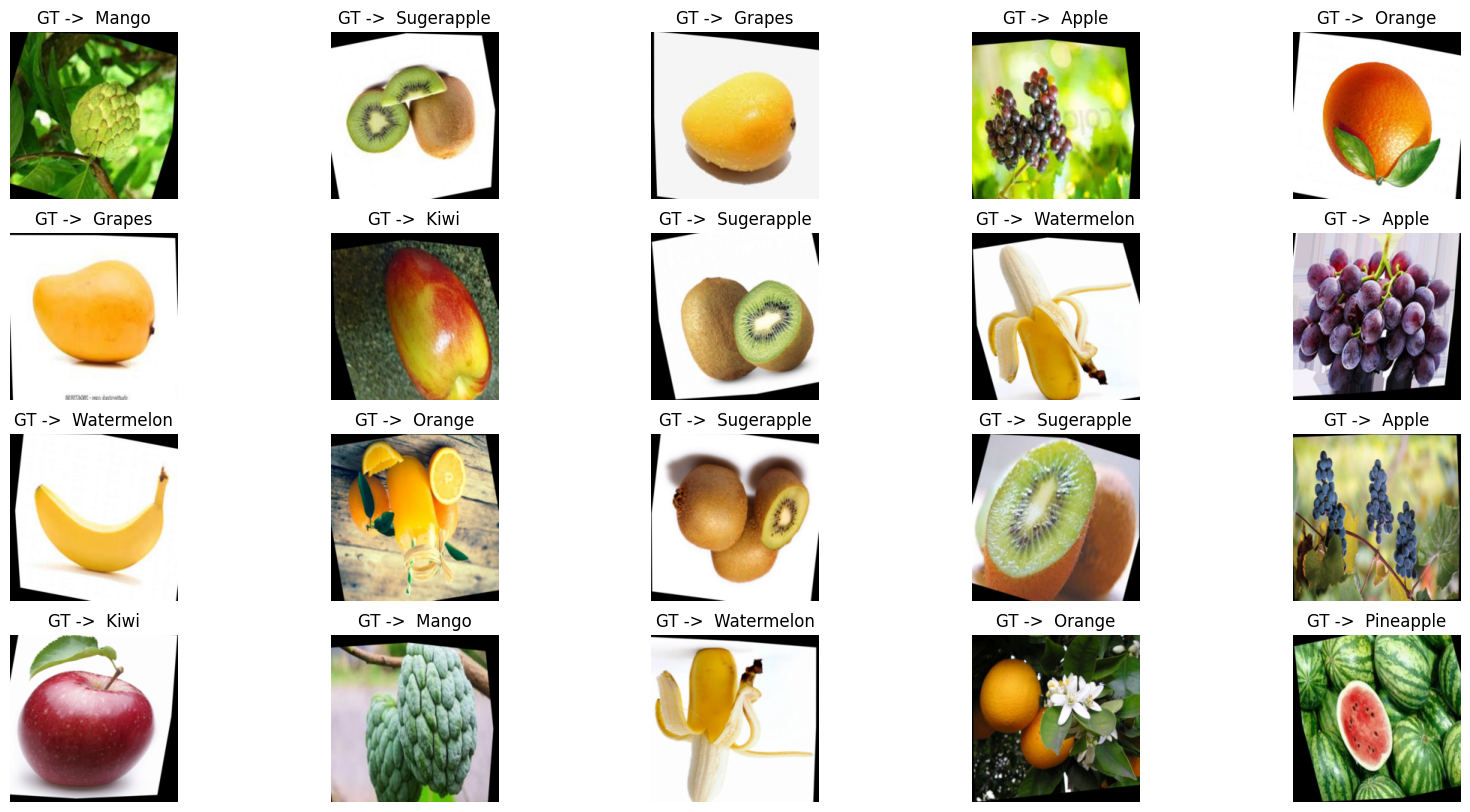

In [2]:
import random
from matplotlib import pyplot as plt

def tensor_2_im(t, t_type = "rgb"):
    
    gray_tfs = T.Compose([T.Normalize(mean = [ 0.], std = [1/0.5]), T.Normalize(mean = [-0.5], std = [1])])
    rgb_tfs = T.Compose([T.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.229, 1/0.224, 1/0.225 ]), T.Normalize(mean = [ -0.485, -0.456, -0.406 ], std = [ 1., 1., 1. ])])
    
    invTrans = gray_tfs if t_type == "gray" else rgb_tfs 
    
    return (invTrans(t) * 255).detach().squeeze().cpu().permute(1,2,0).numpy().astype(np.uint8) if t_type == "gray" else (invTrans(t) * 255).detach().cpu().permute(1,2,0).numpy().astype(np.uint8)

def visualize(data, n_ims, rows, cmap = None, cls_names = None):
    
    assert cmap in ["rgb", "gray"], "Rasmni oq-qora yoki rangli ekanini aniqlashtirib bering!"
    if cmap == "rgb": cmap = "viridis"
    
    plt.figure(figsize = (20, 10))
    indekslar = [random.randint(0, len(data) - 1) for _ in range(n_ims)]
    for idx, indeks in enumerate(indekslar):
        
        im, gt = data[indeks]
        # Start plot
        plt.subplot(rows, n_ims // rows, idx + 1)
        if cmap: plt.imshow(tensor_2_im(im, cmap), cmap=cmap)
        else: plt.imshow(tensor_2_im(im))
        plt.axis('off')
        if cls_names is not None: plt.title(f"GT -> {cls_names[int(gt)]}")
        else: plt.title(f"GT -> {gt}")
            
visualize(tr_dl.dataset, 20, 4, "rgb", list(classes.keys()))

In [ ]:
visualize(val_dl.dataset, 20, 4, "rgb", list(classes.keys()))

In [ ]:
visualize(ts_dl.dataset, 20, 4, "rgb", list(classes.keys()))

<div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>📈 3. Data Analysis 📈</b></font>
</div>

Data is not labeled; so, skipping...
Data is not labeled; so, skipping...
Data is not labeled; so, skipping...
Data is not labeled; so, skipping...
Data is not labeled; so, skipping...
Data is not labeled; so, skipping...


/tmp/ipykernel_33/447682366.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cls_names, rotation = 60)


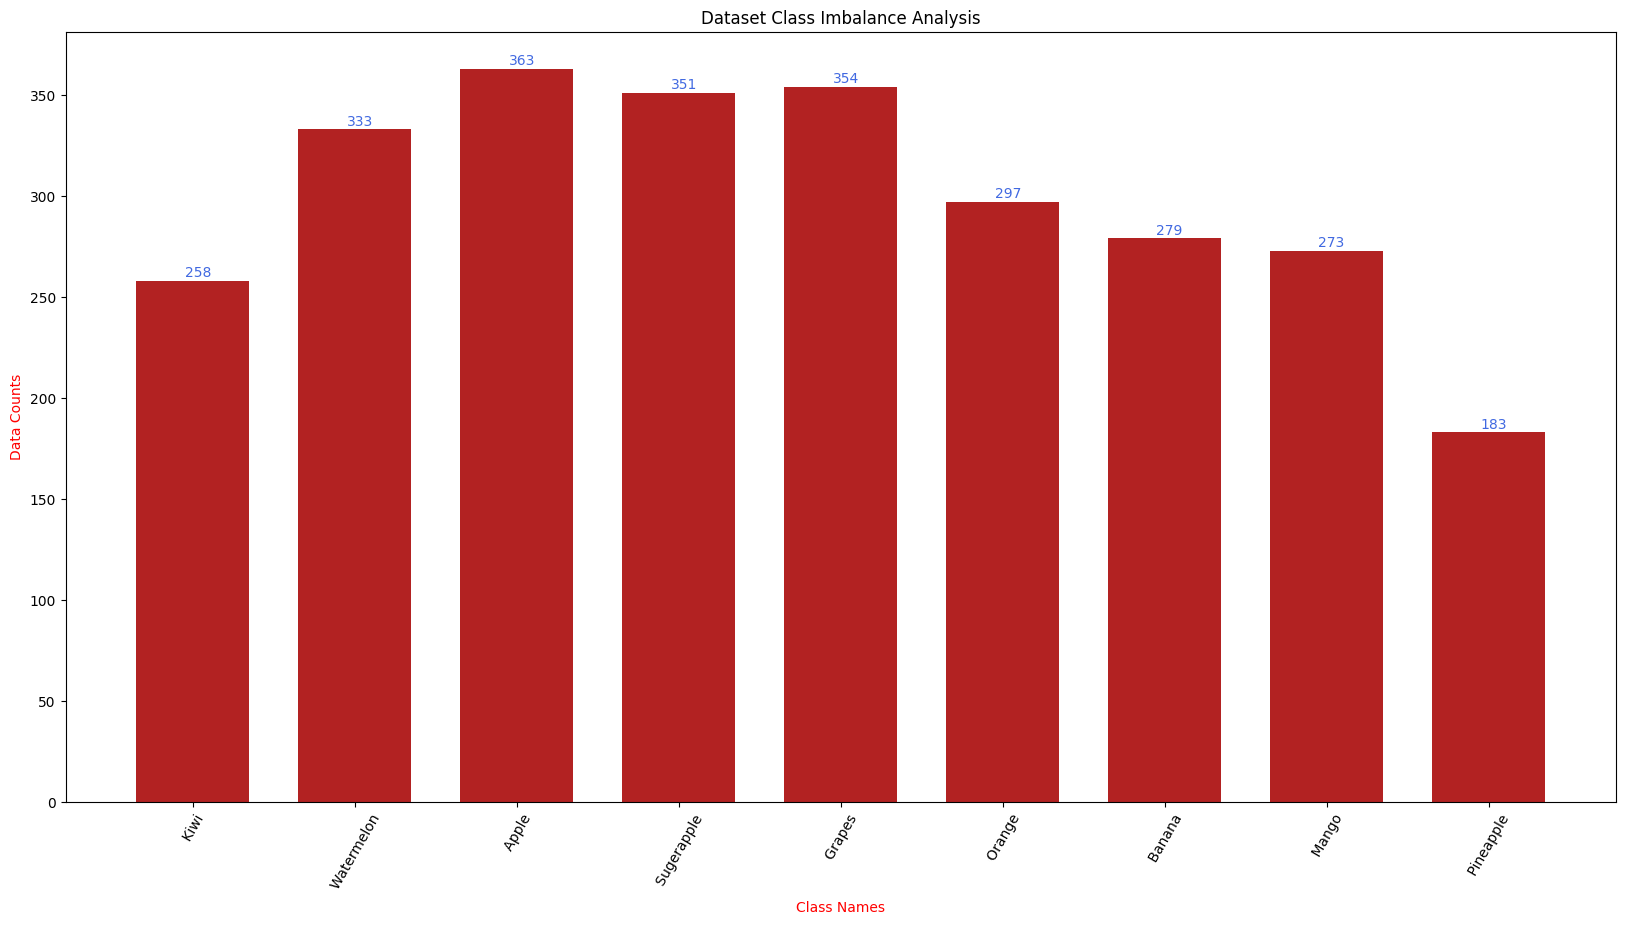

In [3]:
def data_analysis(root, data, transformations, text_height = 2):
    
    ds = CustomDataset(root = root, data_type = data, transformations = transformations)
    cls_counts, width, text_width = ds.cls_counts,  0.7, 0.05
    cls_names = list(cls_counts.keys()); counts = list(cls_counts.values())
    
    fig, ax = plt.subplots(figsize = (20, 10))
    indices = np.arange(len(counts))

    ax.bar(indices, counts, width, color = "firebrick")
    ax.set_xlabel("Class Names", color = "red")
    ax.set_xticklabels(cls_names, rotation = 60)
    ax.set(xticks = indices, xticklabels = cls_names)
    ax.set_ylabel("Data Counts", color = "red")
    ax.set_title(f"Dataset Class Imbalance Analysis")

    for i, v in enumerate(counts): ax.text(i - text_width, v + text_height, str(v), color = "royalblue")
    
data_analysis(root = root, data = "train", transformations = tfs)

In [ ]:
data_analysis(root = root, data = "valid", transformations = tfs, text_height = 0.02)

In [ ]:
data_analysis(root = root, data = "test", transformations = tfs, text_height = 0.02)

<div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>✨ 4. AI Model Train and Validation ✨</b></font>
</div>

In [ ]:
import torch
print(torch.__version__)  # Check PyTorch version
print(torch.version.cuda)  # Check CUDA version


print("CUDA Available:", torch.cuda.is_available())
print("CUDA Device Count:", torch.cuda.device_count())
print("Current CUDA Device:", torch.cuda.current_device())
print("CUDA Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


In [ ]:
import torch
print("PyTorch Version:", torch.__version__)  # Should NOT have "+cpu"
print("CUDA Version:", torch.version.cuda)  # Should show a version, e.g., "11.8"
print("CUDA Available:", torch.cuda.is_available())  # Should be True
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")




In [6]:
import timm, torchmetrics
from tqdm import tqdm
print("Creating_model...")
m = timm.create_model("rexnet_150", pretrained = False, num_classes = len(classes))  

# Load local weights
local_model_path = "/kaggle/input/rexnet-150/pytorch/default/1/pytorch_model.bin"
state_dict = torch.load(local_model_path, map_location="cuda")  # Load weights

# Check if state_dict needs unwrapping
if "model" in state_dict:
    state_dict = state_dict["model"]  # Extract model weights if nested inside a dictionary

# Load state_dict into the model
m.load_state_dict(state_dict, strict=False)  # Use strict=False to allow some flexibility

# Move model to GPU and set to evaluation mode
m.to("cuda").eval()
print("Model loaded successfully!")

print("Get info...")
def train_setup(m): return m.to("cuda").eval(), 10, "cuda", torch.nn.CrossEntropyLoss(), torch.optim.Adam(params = m.parameters(), lr = 3e-4)
def to_device(batch, device): return batch[0].to(device), batch[1].to(device)
def get_metrics(model, ims, gts, loss_fn, epoch_loss, epoch_acc, epoch_f1): preds = model(ims); loss = loss_fn(preds, gts); return loss, epoch_loss + (loss.item()), epoch_acc + (torch.argmax(preds, dim = 1) == gts).sum().item(), epoch_f1 + f1_score(preds, gts)

print("Setup...")
m, epochs, device, loss_fn, optimizer = train_setup(m)

f1_score = torchmetrics.F1Score(task = "multiclass", num_classes = len(classes)).to(device)
save_prefix, save_dir = "frutis", "saved_models"
print("Start training...")
best_acc, best_loss, threshold, not_improved, patience = 0, float("inf"), 0.01, 0, 5
tr_losses, val_losses, tr_accs, val_accs, tr_f1s, val_f1s = [], [], [], [], [], []

best_loss = float(torch.inf)
    
for epoch in range(epochs):

    epoch_loss, epoch_acc, epoch_f1 = 0, 0, 0
    for idx, batch in tqdm(enumerate(tr_dl)):

        ims, gts = to_device(batch, device)

        loss, epoch_loss, epoch_acc, epoch_f1 = get_metrics(m, ims, gts, loss_fn, epoch_loss, epoch_acc, epoch_f1)
        optimizer.zero_grad(); loss.backward(); optimizer.step()

    tr_loss_to_track = epoch_loss / len(tr_dl)
    tr_acc_to_track  = epoch_acc  / len(tr_dl.dataset)
    tr_f1_to_track   = epoch_f1   / len(tr_dl)
    tr_losses.append(tr_loss_to_track); tr_accs.append(tr_acc_to_track); tr_f1s.append(tr_f1_to_track)

    print(f"{epoch + 1}-epoch train process is completed!")
    print(f"{epoch + 1}-epoch train loss          -> {tr_loss_to_track:.3f}")
    print(f"{epoch + 1}-epoch train accuracy      -> {tr_acc_to_track:.3f}")
    print(f"{epoch + 1}-epoch train f1-score      -> {tr_f1_to_track:.3f}")

    m.eval()
    with torch.no_grad():
        val_epoch_loss, val_epoch_acc, val_epoch_f1 = 0, 0, 0
        for idx, batch in enumerate(val_dl):
            ims, gts = to_device(batch, device)
            loss, val_epoch_loss, val_epoch_acc, val_epoch_f1 = get_metrics(m, ims, gts, loss_fn, val_epoch_loss, val_epoch_acc, val_epoch_f1)

        val_loss_to_track = val_epoch_loss / len(val_dl)
        val_acc_to_track  = val_epoch_acc  / len(val_dl.dataset)
        val_f1_to_track   = val_epoch_f1   / len(val_dl)
        val_losses.append(val_loss_to_track); val_accs.append(val_acc_to_track); val_f1s.append(val_f1_to_track)

        print(f"{epoch + 1}-epoch validation process is completed!")
        print(f"{epoch + 1}-epoch validation loss     -> {val_loss_to_track:.3f}")
        print(f"{epoch + 1}-epoch validation accuracy -> {val_acc_to_track:.3f}")
        print(f"{epoch + 1}-epoch validation f1-score -> {val_f1_to_track:.3f}")

        if val_loss_to_track < (best_loss + threshold):
            os.makedirs(save_dir, exist_ok = True)
            best_loss = val_loss_to_track
            torch.save(m.state_dict(), f"{save_dir}/{save_prefix}_best_model.pth")
            
        else:
            not_improved += 1
            print(f"Loss value did not decrease for {not_improved} epochs")
            if not_improved == patience:
                print(f"Stop training since loss value did not decrease for {patience} epochs.")
                break

Creating_model...
Get info...
Setup...
Start training...


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
85it [07:51,  3.76s/it]/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
85it [07:51,  5.55s/it]

1-epoch train process is completed!
1-epoch train loss          -> 1.593
1-epoch train accuracy      -> 0.390
1-epoch train f1-score      -> 0.390


1-epoch validation process is completed!
1-epoch validation loss     -> 1.255
1-epoch validation accuracy -> 0.543
1-epoch validation f1-score -> 0.542


85it [08:57,  6.32s/it]

2-epoch train process is completed!
2-epoch train loss          -> 1.124
2-epoch train accuracy      -> 0.596
2-epoch train f1-score      -> 0.600


2-epoch validation process is completed!
2-epoch validation loss     -> 1.022
2-epoch validation accuracy -> 0.618
2-epoch validation f1-score -> 0.617


85it [09:35,  6.76s/it]

3-epoch train process is completed!
3-epoch train loss          -> 0.910
3-epoch train accuracy      -> 0.677
3-epoch train f1-score      -> 0.673


3-epoch validation process is completed!
3-epoch validation loss     -> 0.847
3-epoch validation accuracy -> 0.720
3-epoch validation f1-score -> 0.721


50it [05:42,  6.86s/it]


KeyboardInterrupt: 

<div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>😍 5. Learning Curves 😍</b></font>
</div>

In [ ]:
class PlotLearningCurves:
    
    def __init__(self, tr_losses, val_losses, tr_accs, val_accs, tr_f1s, val_f1s):
        
        self.tr_losses, self.val_losses, self.tr_accs, self.val_accs, self.tr_f1s, self.val_f1s = tr_losses, val_losses, tr_accs, val_accs, tr_f1s, val_f1s
        
    def plot(self, array_1, array_2, label_1, label_2, color_1, color_2):
        
        plt.plot(array_1, label = label_1, c = color_1); plt.plot(array_2, label = label_2, c = color_2)
        
    def create_figure(self): plt.figure(figsize = (10, 5))
    
    def decorate(self, ylabel, xlabel = "Epochs"): 
        
        plt.xlabel(xlabel); plt.ylabel(ylabel)
        plt.xticks(ticks = np.arange(len(self.tr_accs)), labels = [i for i in range(1, len(self.tr_accs) + 1)])
        plt.legend(); plt.show()      
        
    def visualize(self):
        
        # Figure 1
        self.create_figure()
        self.plot(array_1 = self.tr_losses, array_2 = self.val_losses, label_1 = "Train Loss", label_2 = "Validation Loss", color_1 = "tab:blue", color_2 = "tab:red"); self.decorate(ylabel = "Loss Values")
        
        # Figure 2
        self.create_figure()
        self.plot(array_1 = self.tr_accs, array_2 = self.val_accs, label_1 = "Train Accuracy", label_2 = "Validation Accuracy", color_1 = "tab:blue", color_2 = "tab:red")
        self.decorate(ylabel = "Accuracy Scores")
        
        # Figure 3
        self.create_figure()
        self.plot(array_1 = [tr_f1.cpu() for tr_f1 in self.tr_f1s], array_2 = [vl_f1.cpu() for vl_f1 in self.val_f1s], label_1 = "Train F1 Score", label_2 = "Validation F1 Score", color_1 = "tab:blue", color_2 = "tab:red"); self.decorate(ylabel = "F1 Scores")
        
PlotLearningCurves(tr_losses, val_losses, tr_accs, val_accs, tr_f1s, val_f1s).visualize()

<div style='background-color: #fff7f7; border: 2px solid '>
    <font size="+2" color="blue" ><b>✅ 6. Inference and AI Model Performance Analysis with GradCAM ✅</b></font>
</div>

In [ ]:
import cv2
class SaveFeatures():
    
    """ Extract pretrained activations"""
    features = None
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.features = ((output.cpu()).data).numpy()
    def remove(self): self.hook.remove()

def getCAM(conv_fs, linear_weights, class_idx):
    
    bs, chs, h, w = conv_fs.shape
    cam = linear_weights[class_idx].dot(conv_fs[0,:, :, ].reshape((chs, h * w)))
    cam = cam.reshape(h, w)
    
    return (cam - np.min(cam)) / np.max(cam)

def inference(model, device, test_dl, num_ims, row, final_conv, fc_params, cls_names = None):
    
    weight, acc = np.squeeze(fc_params[0].cpu().data.numpy()), 0
    activated_features = SaveFeatures(final_conv)
    preds, scores, images, lbls = [], [], [], []
    for idx, batch in tqdm(enumerate(test_dl)):
        im, gt = to_device(batch, device)
        score, cls = torch.topk(model(im), k = 2)
        acc += (cls == gt).sum().item()
        images.append(im)
        preds.append(cls[0][0].item())
        scores.append(torch.nn.functional.softmax(score)[0][0].item())
        lbls.append(gt.item())
    
    print(f"Accuracy of the model on the test data -> {(acc / len(test_dl.dataset)):.3f}")
    
    plt.figure(figsize = (20, 10))
    indekslar = [random.randint(0, len(images) - 1) for _ in range(num_ims)]
    
    for idx, indeks in enumerate(indekslar):
        
        im = images[indeks].squeeze()
        pred_idx = preds[indeks]
        heatmap = getCAM(activated_features.features, weight, pred_idx)
        
        # Start plot
        plt.subplot(row, num_ims // row, idx + 1)
        plt.imshow(tensor_2_im(im), cmap = "gray"); plt.axis("off")
        plt.imshow(cv2.resize(heatmap, (im_size, im_size), interpolation=cv2.INTER_LINEAR), alpha=0.4, cmap='jet'); plt.axis("off")
        gt_lbl = cls_names[int(lbls[indeks])]
        pred_lbl = cls_names[int(preds[indeks])]
        
        if cls_names is not None: plt.title(f"PRED -> {pred_lbl} {(scores[indeks]*100):.2f}%", color=("green" if {gt_lbl} == {pred_lbl} else "red"))
        else: plt.title(f"GT -> {gt} ; PRED -> {pred}")

m.load_state_dict(torch.load(f"{save_dir}/{save_prefix}_best_model.pth"))
m.eval()
final_conv, fc_params = m.features[-1], list(m.head.fc.parameters())
inference(model = m.to(device), device = device, test_dl = ts_dl, num_ims = 20, row = 4, cls_names = list(classes.keys()), final_conv = final_conv, fc_params = fc_params)